In [2]:
import matplotlib.pyplot as plt
import numpy as np
from grape.state_vector.multiqubitgates import Pulse, Evolution, Inversion, CXCascade
from grape.state_vector.circuit import Circuit, OneQubitEntanglementAlternation
from grape.state_vector.gradient_optimization import GradientOptimization

In [3]:
def norm(matrix1, matrix2):
    return ((matrix1 - matrix2) @ (matrix1 - matrix2).conjugate().T).trace()

toffoli = np.asarray([[1, 0, 0, 0, 0, 0, 0, 0],
                      [0, 1, 0, 0, 0, 0, 0, 0],
                      [0, 0, 1, 0, 0, 0, 0, 0],
                      [0, 0, 0, 1, 0, 0, 0, 0],
                      [0, 0, 0, 0, 1, 0, 0, 0],
                      [0, 0, 0, 0, 0, 1, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 1],
                      [0, 0, 0, 0, 0, 0, 1, 0]], dtype=complex)

hamiltonian = np.zeros((3, 3))
hamiltonian[0][1] = 0.1385
hamiltonian[1][2] = 0.01304
hamiltonian[0][2] = 0.00148

target = toffoli
size = int(np.log2(target.shape[0]))
circuit = Circuit(size)
for i in range(4):
    circuit += Pulse(size, "general")
    circuit += CXCascade(size)
circuit += Pulse(size, "general")

opt = GradientOptimization(target, circuit, optimizer="adam")
opt.set_hamiltonian(hamiltonian[:size][:size])

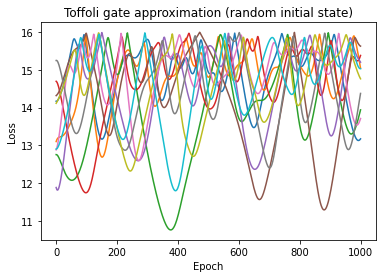

In [7]:
for i in range(10):
    opt.randomize_params()
    plt.plot(opt.descend(steps=1000, track_distance=True))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Toffoli gate approximation (random initial state)")
plt.savefig("general_toffoli_gate_approximation_(random_initial_state).png", format='png', transparent=True)

In [5]:
opt = GradientOptimization(target, circuit, optimizer="adam")
opt.randomize_params()
opt.descend(steps=2000, track_distance=False)
print(opt.metric_distance)

15.037202469204072


/home/black_samorez/anaconda3/envs/GRAPE/lib/python3.9/site-packages/qiskit/circuit/quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


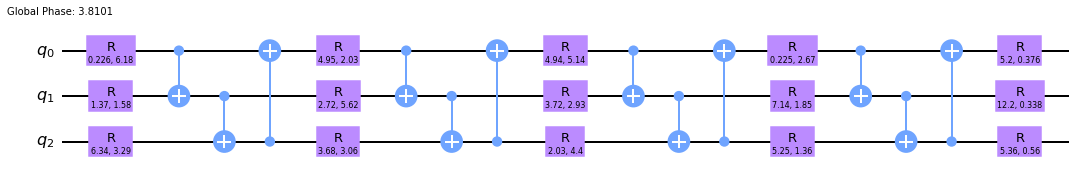

In [6]:
opt.to_qiskit().draw(output='mpl', filename="general_toffoli_scheme.png")